# Ejercicio de introducción a Pytorch
Haremos un recorrido por los aspectos fundamentales de pytroch desde el manejo de tensores hasta el entrenamiento y evaluación de una red neuronal. 
Para completarlo podemos consultar
 [ESTE](https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb#scrollTo=u-L7YQmcHvX8) cuaderno.y otros recursos dados a lo largo del cuaderno.


Primero importamos algunas librerías básicas

In [1]:
## Standard libraries
import os
import math
import numpy as np 
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm


C:\Users\prestamour\AppData\Local\Temp\ipykernel_11624\3787987072.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [29]:
#Pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torch.utils.data
import torchvision.transforms as transform

Primero recordemos algunas funcionalidades de los tensores.

In [3]:
# Generar un arreglo en numpy.array
#
t = torch.rand(100,110, 3)
t

tensor([[[0.1171, 0.0667, 0.2027],
         [0.3351, 0.6419, 0.0658],
         [0.3335, 0.2106, 0.6372],
         ...,
         [0.8322, 0.0428, 0.2305],
         [0.6011, 0.3806, 0.8096],
         [0.1554, 0.1968, 0.3419]],

        [[0.9196, 0.2874, 0.2947],
         [0.9443, 0.1068, 0.9852],
         [0.3360, 0.0373, 0.9338],
         ...,
         [0.2666, 0.4517, 0.5335],
         [0.5616, 0.1787, 0.6930],
         [0.1303, 0.1990, 0.5176]],

        [[0.2796, 0.7530, 0.7162],
         [0.5695, 0.4043, 0.8618],
         [0.4789, 0.3248, 0.7637],
         ...,
         [0.6399, 0.4003, 0.5085],
         [0.5786, 0.3575, 0.8230],
         [0.9425, 0.3208, 0.4698]],

        ...,

        [[0.3090, 0.5411, 0.4503],
         [0.5168, 0.5406, 0.9190],
         [0.4433, 0.4202, 0.7220],
         ...,
         [0.1087, 0.1766, 0.0659],
         [0.2385, 0.4420, 0.6196],
         [0.0833, 0.1053, 0.5927]],

        [[0.9261, 0.3244, 0.4024],
         [0.7760, 0.2903, 0.0618],
         [0.

In [42]:
# Se realizan permutaciones sobre las 3 dimensiones 
# torch.permute(t, (0,3,2,1))
torch.permute(t, (0,2,1))

tensor([[[0.0493, 0.7723, 0.0704,  ..., 0.3628, 0.2785, 0.9496],
         [0.3038, 0.3339, 0.3034,  ..., 0.5471, 0.3361, 0.7048],
         [0.7319, 0.2409, 0.0284,  ..., 0.1506, 0.6088, 0.3124]],

        [[0.7132, 0.8906, 0.7391,  ..., 0.3412, 0.7168, 0.5767],
         [0.8051, 0.2785, 0.2114,  ..., 0.2594, 0.9299, 0.1828],
         [0.2585, 0.5699, 0.8441,  ..., 0.8107, 0.5241, 0.9871]],

        [[0.2587, 0.1338, 0.2096,  ..., 0.1417, 0.2127, 0.0530],
         [0.8864, 0.7250, 0.4833,  ..., 0.5501, 0.9041, 0.2265],
         [0.2999, 0.2669, 0.9208,  ..., 0.1718, 0.1990, 0.7527]],

        ...,

        [[0.5584, 0.1078, 0.0648,  ..., 0.7418, 0.8031, 0.2347],
         [0.7162, 0.5252, 0.3773,  ..., 0.2400, 0.0098, 0.9169],
         [0.2761, 0.0872, 0.9389,  ..., 0.9020, 0.9031, 0.6531]],

        [[0.4604, 0.5396, 0.8253,  ..., 0.9943, 0.2798, 0.3945],
         [0.5113, 0.8254, 0.6028,  ..., 0.1710, 0.1425, 0.2644],
         [0.1537, 0.7320, 0.5587,  ..., 0.5543, 0.2855, 0.6756]],

 

In [4]:
# Crear un tensor aleatorio con entradas entre 0 y 1, de tamaño 3x3
primer_tensor = torch.rand(3, 3)

# Crear un tensor de tamaño 3x3 con valores en una distribución normal estandar
segundo_tensor = torch.randn(3,3)
# Calcular el tamaño de los tensores
tensor_size1 = primer_tensor.size()
tensor_size2 = segundo_tensor.size()

# Imprimir los valores de los vectores y su tamaño
print('Primero:',primer_tensor)
print('Segundo:',segundo_tensor)
print('Primero Tamaño:',tensor_size1)
print('Segundo Tamaño:',tensor_size2)


Primero: tensor([[0.4851, 0.4590, 0.7691],
        [0.1070, 0.6611, 0.9725],
        [0.3053, 0.4454, 0.5234]])
Segundo: tensor([[-0.1408, -0.9181,  0.1142],
        [ 0.4785, -1.9852,  0.7524],
        [ 0.0088, -0.2876, -0.0041]])
Primero Tamaño: torch.Size([3, 3])
Segundo Tamaño: torch.Size([3, 3])


In [5]:
# Crear una matriz de unos de tamaño 3 by 3
tensor_of_ones = torch.ones(3, 3)

# Crear una matrix identidad de tamaño 3 by 3
identity_tensor = torch.diag(torch.ones(3))

# Multiplicar las dos matrices anteriores
matrices_multiplied = torch.matmul(tensor_of_ones, identity_tensor)
print('multiplicacion matmul:\n',matrices_multiplied)


# ¿Qué ocurre si las multiplica usando * ?
# Se multiplica entrada por entrada entre matrices
print('multiplicacion *:\n',tensor_of_ones *identity_tensor)

multiplicacion matmul:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
multiplicacion *:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Cálculo de gradientes
Calculemos un gradiente utilizando Pytorch. La función está en la gráfica Graph0.

Para esto, puede ir a la sección Dynamic Computation Graph and Backpropagation, del cuaderno inicial.
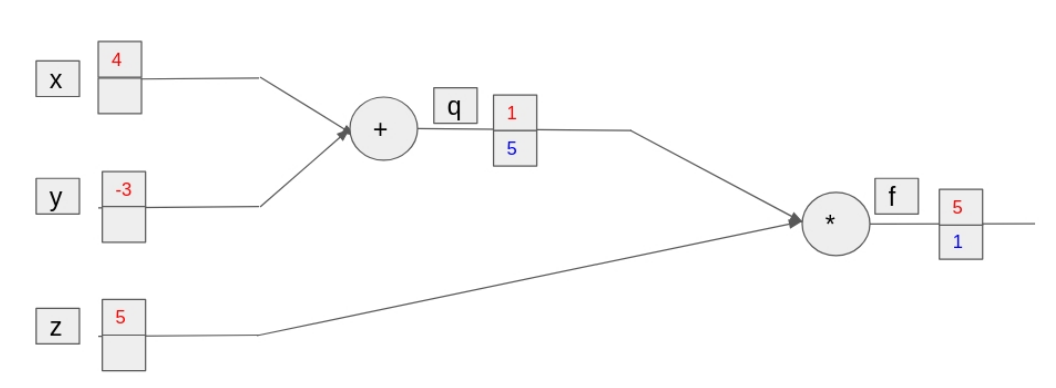

In [6]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True) # Solo flotantes tienen gradientes
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

# Set q to sum of x and y, set f to product of q with z
q = x+y
f = q*z

# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

Gradient of x is: tensor(5.)
Gradient of y is: tensor(5.)
Gradient of z is: tensor(1.)


Ahora calculemos los gradientes para la función descrita en la imagen Graph1
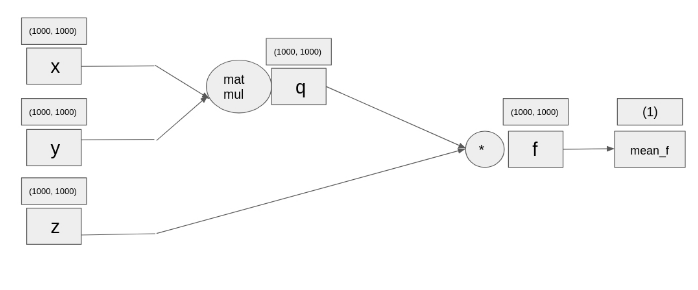

In [8]:
# Initializar x,y,z como tensores aleatorios de tamaño (1000,1000)
x = torch.rand(1000,1000).requires_grad_(True)
y = torch.rand(1000,1000).requires_grad_(True)
z = torch.rand(1000,1000).requires_grad_(True)

# Multiplicar los tensores x con y
q = torch.matmul(x,y.permute(1, 0))

# Multiplicar componente a componente los tensores z con q
print(z.size())
print(q.size())
f = z*q

mean_f = torch.mean(f)

# Calcular los gradientes
mean_f.backward()
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

torch.Size([1000, 1000])
torch.Size([1000, 1000])
Gradient of x is: tensor([[0.0002, 0.0003, 0.0002,  ..., 0.0003, 0.0002, 0.0002],
        [0.0002, 0.0003, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0002, 0.0003, 0.0002,  ..., 0.0003, 0.0002, 0.0002],
        ...,
        [0.0002, 0.0003, 0.0002,  ..., 0.0003, 0.0002, 0.0002],
        [0.0002, 0.0003, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        [0.0002, 0.0003, 0.0002,  ..., 0.0003, 0.0003, 0.0003]])
Gradient of y is: tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0002],
        [0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0002],
        ...,
        [0.0002, 0.0002, 0.0003,  ..., 0.0003, 0.0003, 0.0002],
        [0.0002, 0.0002, 0.0003,  ..., 0.0003, 0.0002, 0.0002],
        [0.0003, 0.0002, 0.0003,  ..., 0.0002, 0.0002, 0.0002]])
Gradient of z is: tensor([[0.0003, 0.0003, 0.0002,  ..., 0.0003, 0.0003, 0.0003],
        [0.0003, 0.0002, 0.0003,  ..

### Construcción de redes neuronales con Pytorch

Construimos una red neuronal en Pytorch de forma *manual*. la entrada serán imágenes de tamaño (28,28). Es decir contienen pixeles de 784 pixeles. 
La red contendrá una capa de entrada, una capa oculta con 200 unidades y una capa de salida con 10 categorías.

In [9]:
input_layer=torch.rand(784)
# Inicializar los pesos de la red neuronal
weight_1 = torch.rand(784,200)
weight_2 = torch.rand(200,10)

# Multiplicar la capa de entrada con el peso 1
hidden_1 = torch.matmul(input_layer,weight_1)

# Multiplicar la capa oculta con el peso 2
output_layer = torch.matmul(hidden_1,weight_2)
print(output_layer)

tensor([20278.3145, 20981.8730, 21721.3418, 19474.8457, 19393.3086, 17605.4121,
        18998.4863, 19564.4883, 17395.7773, 19698.0898])


Ahora construimos la misma rede neuronal pero utilizando los módulos de Pytorch. (Ver sección *The model* del cuaderno)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Inicializar las dos capas lineales 
        self.fc1 = nn.Linear(784,200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):
      
        # Usar las capas inicializadas y devolver x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

Construyamos la red neuronal en la gráfica NN1 dada ede forma *manual*

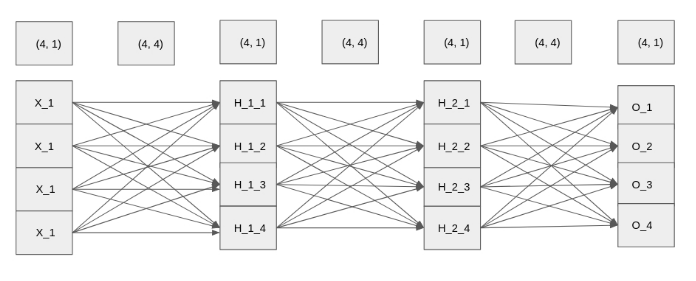


In [23]:
# Crear tensor aleatorio como capa de entrada
input_layer= torch.rand(4)

# Crear matrices de pesos
weight_1= torch.rand(4,4)
weight_2= torch.rand(4,4)
weight_3= torch.rand(4,4)

# Calcular la primera y segunda capa oculta

hidden_1 = torch.matmul(input_layer,weight_1)
hidden_2 = torch.matmul(hidden_1,weight_2)

# Imprimir la salida
print(torch.matmul(hidden_2,weight_3))


tensor([4.1164, 4.0902, 2.6442, 3.4558])


La anterior era una red neuronal con 2 capas ocultas ocultas en donde no se aplica ninguna función no-lineal. Veamos que ésta se puede construir con una sola capa oculta.

In [24]:
# Calcular la compuesta de las matrices de pesos
weight_composed_1 = torch.matmul(weight_1,weight_2)
weight = torch.matmul(weight_composed_1,weight_3)

# Multiplicar la capa de entrada por weight e imprimir
print(torch.matmul(input_layer,weight))

tensor([4.1164, 4.0902, 2.6442, 3.4558])


## Entrenamiendo de una red neuronal para reconocimiento de dígitos (MNIST Dataset)
### Preparar los datos

Para preparar los datos primero creamos un parámetro *transform* para transformarlos. Haremos dos cosas:
- Transformar las imágenes del MNIST Dataset a tensores para poder alimentar la red neuronal. Esto lo hacemos con el método ToTensor.
- Por otro lado, debemos normalizarlos con respecto a una media y variaza. Esto lo hacemos con el método Normalize. En este caso usaremos una media de 0.1307 y varianza de 0.3081. (Tenga en cuenta que en el MNIST Dataset los pixeles son en escala de grises, por lo cual sólo tienen un canal de código de color.)

Para componer ambas transformaciones (Convertir a tensor y normalizar) usamos transforms.Compose ver [AQUÍ](https://www.programcreek.com/python/example/104832/torchvision.transforms.Compose)


In [30]:
# Transformar los datos a tensores y normalizarlos 
transforms = transform.Compose([transform.ToTensor(),
								transform.Normalize(mean = 0.1307, std = np.sqrt(0.3081))])

Ahora definimos el conjunto de entrenamiento y testeo. Torchvision permite cargar datasets conocidos para visión como el MNIST. 
Para entender y completar los parámetros ver [AQUÍ](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html).

In [31]:
# Preparar el training set y testing set
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transforms)
testset = torchvision.datasets.MNIST('mnist',train=False,download=True, transform=transforms)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw



El método DataLoader hace parte de torch.utils.data y permite cargar los datos por lotes de un tamaño definido. Para entender los parámetros ver [AQUÍ](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).
Preparar los datos para entrenamiento y testeo de manera que se procesen 32 imágenes cada vez y se barajen cada vez.

In [32]:
# Preparar training loader y testing loader. 
# Usar los parámetros dataset, batch_size, shuffle y num_workers.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True, num_workers=0)

Construya una clase para una red neuronal que será usada para entrenar el MNIST dataset. El dataset contiene imagenes de dimensiones (28,28,2), así que usted deducirá el tamaño de la capa de entrada. Para las capas ocultas use 200 unidades y para la capa de salida 10 unidades (una por cada categoría (Dígitos del 0 al 9)).
Como función de activación use Relu de manera funcional (nn.Functional ya está importado como F).


In [41]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):   
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Entrenamiento del modelo

Por favor analice cuidadosamente el siguiente código, hasta que quede claro los pasos de entrenamiento y evaluación del modelo.

En primer lugar, revisemos si estamos trabajando en GPU. De lo contrario debemos cambiar el tipo de entorno de ejecución en el menú de Colab.

In [42]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


Le daremos nombre a nuestro dispositivo GPU, al cual debemos transferir nuesto modelo y los datos a utilizar.

In [43]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


Definimos nuestro modelo

In [44]:
model=Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)


Empujamos nuestro modelo al dispositivo GPU

In [45]:
# Push model to device. Has to be only done once
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

Definimos el ptimizador y la función de costo

In [46]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # descenso de gradiente
loss_module = nn.CrossEntropyLoss()  #función de costo

Entrenamos el modelo, siguiendo los 5 pasos vistos en clase

In [47]:
def train_model(model, optimizer, testloader, loss_module, num_epochs=1):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in testloader:
            data_inputs = data_inputs.view(-1, 28 * 28)
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

           
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

In [48]:
train_model(model, optimizer, trainloader, loss_module)

  0%|          | 0/1 [00:00<?, ?it/s]

A continuación evaluaremos el desempeño del modelo

In [49]:
model.eval()
total, correct =0,0
for i, data in enumerate(testloader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    
    # Put each image into a vector
    inputs = inputs.view(-1, 784)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    
    _, outputs = torch.max(outputs.data, 1) #mayor valor entre los dígitos.
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

The testing set accuracy of the network is: 79 %
